<img src="images/oasis-lmf-colour.png" alt="Oasis LMF logo" width="250" align="left"/>
<br><br><br>

# Excercise 1:   Exposure data in OED

The Oasis platform imports exposure data in OED format (Open Exposure Data). This is a completely open data format maintained by Simplitium. The full specification can be found [here](https://github.com/Simplitium/OED/). In particular, the Data Spec spreadsheet can be referred to in this excercise.

Later in the workshop we will be using the Gem Dominican Republic Earthquake model, so in this excercuse we will construct some test exposure data.

In [23]:
# General imporyts
import pandas as pd
import numpy as np
import jupyter_helper

The basic set of location fields that we will use are:

| Input Field Name | Type & Description | Required Field | Data Type   | Default |
| ---------------- | ------------------ | -------------- | ----------- | ------- |
| PortNumber	   | Portfolio number	| R	             | varchar(20) | n/a     |
| AccNumber	       | Account number	    | R	             | nvarchar(40)| n/a     |
| AccPeril	Perils for account financial terms	CR	varchar(250)	YES	n/a
Acc	PolNumber	Policy layer number	R	varchar(20)	NO	n/a
Acc	LayerNumber	Layer number	O	int	YES	1
Acc	LayerParticipation	Insurance company share of the policy layer. Values between 0 to 1 (e.g. 12% entered as 0.12)	O	float	YES	1
Acc	LayerLimit	Policy layer limit	O	float	YES	0
Acc	LayerAttachment	Policy layer attachment point	O	float	YES	0
Loc	LocNumber	Location number	R	nvarchar(20)	NO	n/a
Loc	AreaName	Name relating to the AreaCode (e.g. State name). See AreaCode Values sheet for details.	O	nvarchar(50)	YES	n/a
Loc	GeogScheme1	Geography scheme: Descriptor of the geography scheme used in relation to the geography name in the corresponding GeogName field (e.g. PC4). User can specify values in addition to those listed in the GeogScheme values list, but user defined scheme values must start with 'X'.	O	varchar(5)	YES	n/a
Loc	GeogName1	Geography name: Descriptor of the geographical area, using the scheme referenced in the corresponding GeogScheme field (e.g. SO31)	O	nvarchar(50)	YES	n/a
Loc	Latitude	Latitude in degrees (-90.0 to +90.0)	O	decimal	YES	0
Loc	Longitude	Longitude in degrees (-180.0 to +180.0)	O	decimal	YES	0
Loc	CountryCode	Country code (based on ISO3166 alpha-2 codes)	R	char(2)	NO	
Loc	BuildingTIV	Building Total Insured Value	R	float	NO	n/a
Loc	OccupancyCode	OED occupancy code	O	int	YES	1000
Loc	ConstructionCode	OED construction code	O	int	YES	5000
Loc	YearBuilt	Year built (4 digit year)	O	smallint	YES	0
Loc	NumberOfStoreys	Number of storeys	O	tinyint	YES	0
Loc	NumberOfBuildings	Number of buildings	O	int	YES	1
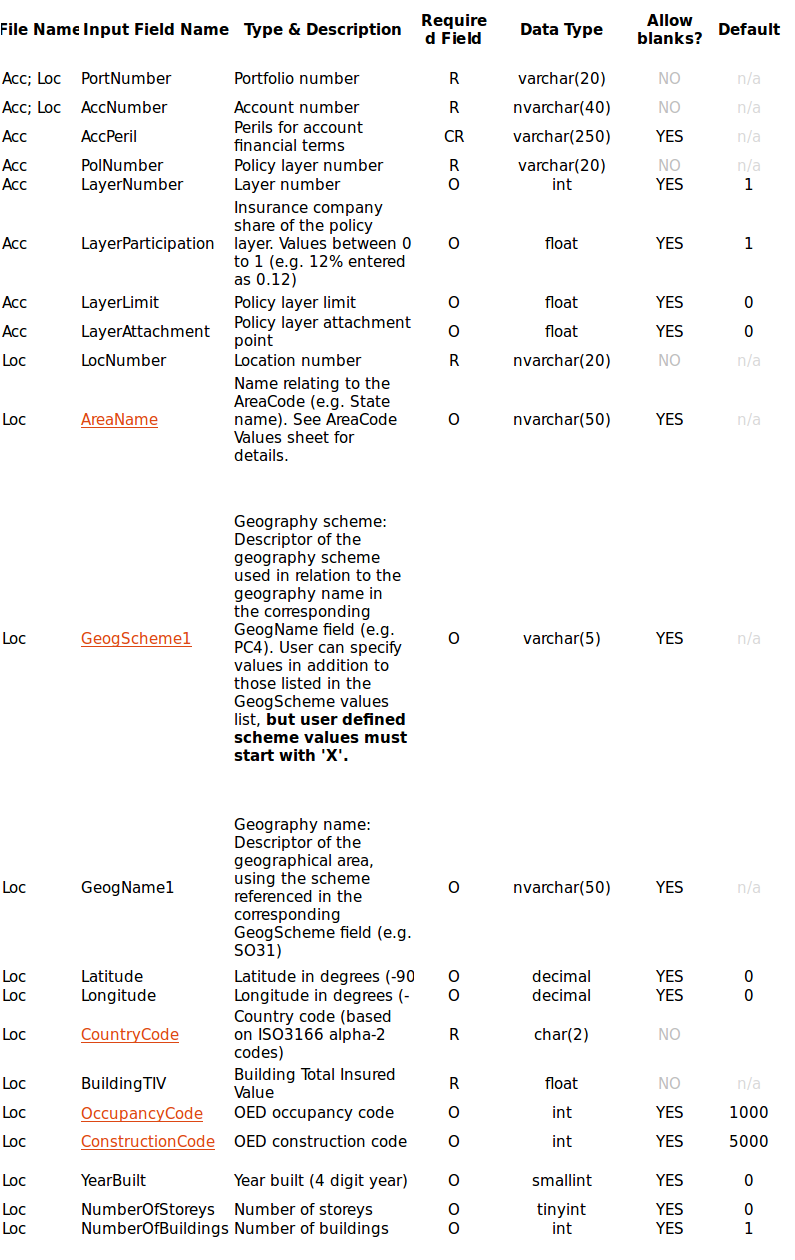
    ('PortNumber',        str),
    ('AccNumber',         str),
    ('LocNumber',         str),
    ('AreaName1',         str),
    ('Latitude',          float),
    ('Longitude',         float), 
    ('CountryCode',       str),
    ('ConstructionCode',  str),
    ('OccupancyCode',     str),
    ('YearBuilt',         int),
    ('YearUpgraded',      int),
    ('NumberOfStoreys',   int),
    ('NumberOfBuildings', int),
    ('LocPerilsCovered',  int),
    ('BuildingTIV',     int)])
data = np.empty(0, dtype=dtypes)
location_df = pd.DataFrame(data)


In [25]:
locations_df = pd.DataFrame.from_dict({
    'PortNumber':           ['1'                ],
    'AccNumber':            ['146'              ],
    'LocNumber':            ['1'                ],
    'GeogName':             ['Pedro Brand'      ],
    'AreaName1':            ['Santa Domingo'    ],
    'Latitude':             [18.64788           ],
    'Longitude':            [-70.09339],
    'CountryCode':          ['DR'],
    'ConstructionCode':     [5050],
    'OccupancyCode':        [1050],
    'YearBuilt':            [1900],
    'YearUpgraded':         [1900],
    'NumberOfStoreys':      [1],
    'NumberOfBuildings':    [1],
    'LocPerilsCovered':     ['QEQ'],
    'BuildingTIV':          [100000]
 })  

accounts_df = pd.DataFrame.from_dict({
    'PortNumber':           ['1'                ],
    'AccNumber':            ['146'              ],
    'PolNumber':            ['1'],
    'LayerAttachment':      [0],
    'LayerLimit':           [1000],
    'LayerParticipation':   [1.0]
 })  


In [41]:
import os
import shutil

src_dir = '/tmp/excercise_1_oed'
if os.path.exists(src_dir):
    shutil.rmtree(src_dir)
os.mkdir(src_dir)

run_dir = '/tmp/excercise_1_run'
if os.path.exists(run_dir):
    shutil.rmtree(run_dir)
os.mkdir(run_dir)

locations_df.to_csv(
    os.path.join(src_dir, "location.csv")
)
accounts_df.to_csv(
    os.path.join(src_dir, "account.csv")
)
#! oasislmf exposure run -s /tmp/excercise_1_oed

from oasislmf.manager import OasisManager as om
guls_df, ils_df, rils_df = om().run_deterministic(
    src_dir=src_dir,
    run_dir=run_dir,
    loss_percentage_of_tiv=0.5
    # net_ri=net_ri,
    # alloc_rule=alloc_rule
)

print(guls_df)
print(ils_df)






Generating deterministic ground-up and direct insured losses with command: gultobin -S 1 < /tmp/excercise_1_run/output/raw_guls.csv | fmcalc -p /tmp/excercise_1_run/output -a 2 | tee ils.bin | fmtocsv > /tmp/excercise_1_run/output/raw_ils.csv

   event_id  item_id     loss
0         1        1  50000.0
   event_id  output_id    loss
0         1          1  1000.0


In [33]:
import folium

m = folium.Map(location=[18.64, -70.09], zoom_start=7, tiles='cartodbpositron')
for i, row in locations_df.iterrows():
    folium.CircleMarker(
        location=[row.Latitude, row.Longitude], radius=1).add_to(m)
#m.fit_bounds(m.get_bounds())
m

